# PAP2: V232 Michelson-Interferometer

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Werte in roher Form:
Beste Werte aus Fit:
[  0.06801104  50.13935522]
Fehler der Werte aus Fit (Wurzel der Kovarianzmatrixwerte)
[ 0.00028027  0.12237637]
Chiquadratsumme:
0.48232767675
Fitwahrscheinlichkeit=100.0%


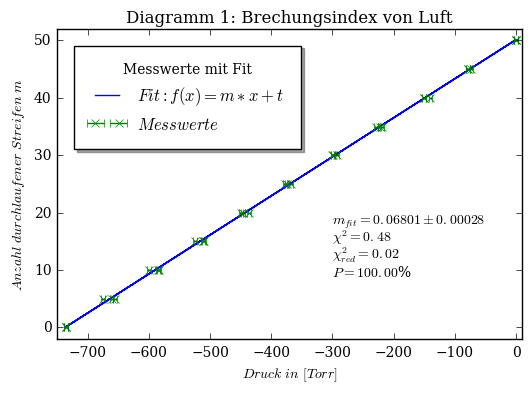

In [40]:
#Aufgabe 2: Brechungsindex von Luft

#Import der Module
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#Einlesen der Daten in folgender Reihenfolge:
z1, p1, p2, p3 = np.loadtxt('tab2.txt', skiprows=1, usecols=(0,1,2,3), unpack=True)
p1 = p1*(-1)
p2 = p2*(-1)
p3 = p3*(-1)

z = np.concatenate((z1, z1, z1), axis=0)
p = np.concatenate((p1, p2, p3), axis=0)

# Fit mit einer Lineare Fitfunktion
def fit(x, m, t):
    return m*x + t

#Fit durchführen
popt, pcov = curve_fit(fit, p, z, maxfev=5000, sigma=3)
perr = np.sqrt(np.diag(pcov))


#Güte des Fits
chisquare=np.sum((((fit(p,*popt))-z)/(3))**2)
dof=30 #degrees of freedom, Freiheitsgrad Anzahl Messwerte (33) - Fitparameter (3)
chisquare_red=chisquare/dof
from scipy.stats import chi2 
prob=round(1-chi2.cdf(chisquare,dof),2)*100 


#Plotten

plt.plot(p, fit(p, *popt), label='$Fit: f(x)=m*x+t$')
plt.errorbar(p, z, xerr=3, linestyle='None', marker='x', label='$Messwerte$')


plt.ylabel('$Anzahl\ durchlaufener\ Streifen\ m$')
plt.xlabel('$Druck\ in\ [Torr]$')
plt.title(r'Diagramm 1: Brechungsindex von Luft')
#plt.yscale('log')
#plt.grid(True)
plt.axis((-750, 10, -2, 52))
#plt.rcParams["figure.figsize"][0] = 8
#plt.rcParams["figure.figsize"][1] = 5
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1.0, borderaxespad=1, loc='best', shadow='true')
#Text im Plot

plt.text(-300, 18, u'$m_{fit}=%.5f \pm%.5f$' %(popt[0], perr[0]), fontsize=10)
plt.text(-300, 15, u'$\chi^{2}=%.2f$' %(chisquare), fontsize=10)
plt.text(-300, 12, u'$\chi_{red}^{2}=%.2f $' %(chisquare_red), fontsize=10)
plt.text(-300, 9, u'$P=%.2f $' %(prob) + '%', fontsize=10)

print('Werte in roher Form:')
print('Beste Werte aus Fit:')
print(popt)
print('Fehler der Werte aus Fit (Wurzel der Kovarianzmatrixwerte)')
print(perr)
print('Chiquadratsumme:')
print (chisquare)
print("Fitwahrscheinlichkeit="+str(prob)+"%")

#plt.savefig('v232_1.pdf',format='pdf')

[ 0.0017983   0.02453014  0.01197383  0.01062456]
[[  1.28927258e-09   2.67226766e-13   5.73828929e-09  -1.01559123e-08]
 [  2.67226766e-13   3.84004158e-08  -1.39536524e-09   5.45576081e-10]
 [  5.73828929e-09  -1.39536524e-09   5.03924597e-08  -4.40279211e-08]
 [ -1.01559123e-08   5.45576081e-10  -4.40279211e-08   1.60931157e-07]]


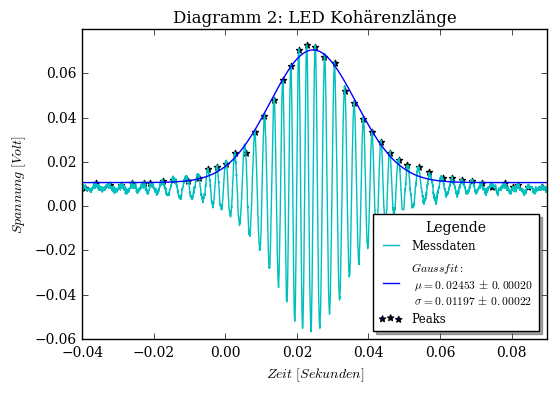

In [225]:
#Berechnung der Kohärenzlänge einer Leuchtdiode: 

#Einlesen der Daten in folgender Reihenfolge:
a, b, = np.loadtxt('tab1.txt', skiprows=2, usecols=(0,1), unpack=True, delimiter=',')
x = a[6000:-3600]
y = b[6000:-3600]

#Peaks finden
from scipy import signal
peaks = signal.find_peaks_cwt(y, np.arange(1.00,100),noise_perc=20)

#Fitfunktion Gauss
def Gauss(t, a, mu, sig, c):
    return a/np.sqrt(2*np.pi)/sig*np.exp(-(t-mu)**2/(2*sig**2)) + c

popt, pcov = curve_fit(Gauss, x[peaks], y[peaks], p0=[0.002, 0.02, 0.012, 0.01])
perr = np.sqrt(np.diag(pcov))
print(popt)
print(pcov)

plt.scatter(x[peaks],y[peaks],marker='*', label='Peaks')
plt.plot(x,y,color='c', label='Messdaten')
plt.plot(x, Gauss(x, *popt), label='$Gaussfit:$ \n $\\mu=%.5f$ $\\pm$ $%.5f$ \n $\\sigma=%.5f$ $\\pm$ $%.5f$' %(popt[1], perr[1], popt[2], perr[2]))

plt.xlabel('$Zeit\ [Sekunden]$')
plt.ylabel('$Spannung\ [Volt]$')
plt.title('Diagramm 2: LED Kohärenzlänge')
plt.rcParams["font.family"]='serif'
plt.legend(title='Legende', borderpad=0.5, borderaxespad=0.7, shadow='true', fontsize='small', loc='best')
#bbox_to_anchor=(1.15, 0), loc='upper right', ncol=2
plt.axis((-0.04, 0.09, -0.06, 0.08))

#plt.savefig('v232_2.pdf',format='pdf')